### 이미지 로딩 기본

In [1]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

cv2.imshow("src",img_src)

cv2.waitKey()
cv2.destroyAllWindows()

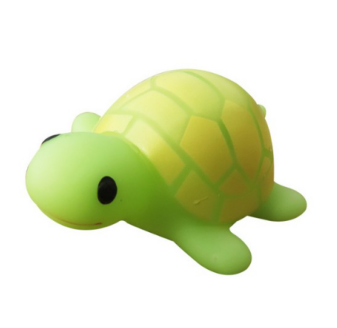

In [3]:
show_matplotlib_image(img_src)

- matplotlib 사용 코드

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_matplotlib_image(bgrImage, row_size=8, col_size=4):
    img_dst = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (row_size,col_size))
    plt.axis('off')
    plt.imshow(img_dst)
    plt.show()

-글자 한글 출력

In [2]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

def input_korean(img_dst, input_text, pt, color, fontsize=20):
    my_font = ImageFont.truetype("font/gulim.ttc", fontsize)
    img_dst = Image.fromarray(img_dst)
    mydraw = ImageDraw.Draw(img_dst)
    mydraw.text((pt[0], pt[1]), input_text, font=my_font, fill=(color[0], color[1], color[2]))
    return np.array(img_dst)

### 컬러 이미지를 Gray로 바꾸기

In [14]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

######## GRAY로 변환 ########
red = (0,0,255)
img_gray_1ch = cv2.cvtColor(img_src,cv2.COLOR_BGR2GRAY)      # 1-Channel gray
cv2.putText(img_gray_1ch, 'Hello', (int(width/2)-50,int(height/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, red, 2)
img_gray_3ch = cv2.cvtColor(img_gray_1ch,cv2.COLOR_GRAY2BGR) # 3-Channel gray
cv2.putText(img_gray_3ch, 'Hello', (int(width/2)-50,int(height/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, red, 2)
#################################

cv2.imshow("result-gray",img_gray_1ch)
cv2.imshow("result-color",img_gray_3ch)

cv2.waitKey()
cv2.destroyAllWindows()

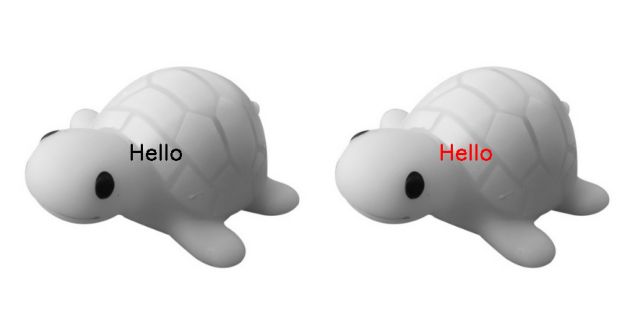

In [12]:
img_gray_1ch = cv2.cvtColor(img_gray_1ch, cv2.COLOR_GRAY2BGR)
img_merge = cv2.hconcat([img_gray_1ch,img_gray_3ch])
show_matplotlib_image(img_merge)

### 이미지 자르기

In [46]:
import numpy as np
a = np.zeros((4,5), dtype=np.uint8 )
b = np.arange(20).reshape(4,5).astype(np.uint8)

In [47]:
print(a)
print(b)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [41]:
b[1,1:4]

array([6, 7, 8], dtype=uint8)

In [40]:
print(b[1,1],b[2,1])
print(b[1:3,1])
print(b[1:3,1:4])

6 11
[ 6 11]
[[ 6  7  8]
 [11 12 13]]


In [51]:
a = np.zeros((4,5), dtype=np.uint8 )
b = np.arange(20).reshape(4,5).astype(np.uint8)
a[1:3,1:4] = b[1:3,1:4]
print(a)
print()
print(b)

[[ 0  0  0  0  0]
 [ 0  6  7  8  0]
 [ 0 11 12 13  0]
 [ 0  0  0  0  0]]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [52]:
a = np.zeros((4,5), dtype=np.uint8 )
b = np.arange(20).reshape(4,5).astype(np.uint8)
# 크기만 같으면 어느곳에도 붙여 넣을 수 있다.
a[0:2,0:3] = b[1:3,1:4]
print(a)
print()
print(b)

[[ 6  7  8  0  0]
 [11 12 13  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [55]:
import cv2
import numpy as np

img_src = cv2.imread('images/pawn.webp', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
#############################################################
#  70, 370     465, 370
#  70,1240     465,1240
# (370:1240, 70:465,  :)
# img_src[rows,cols,ch]
img_gray = cv2.cvtColor(img_src,cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR)
img_src[370:1240,70:465,:] =img_gray[370:1240,70:465,:]
#########################################################
img_src = cv2.pyrDown(img_src)
cv2.imshow('src',img_src)
cv2.waitKey()
cv2.destroyAllWindows()

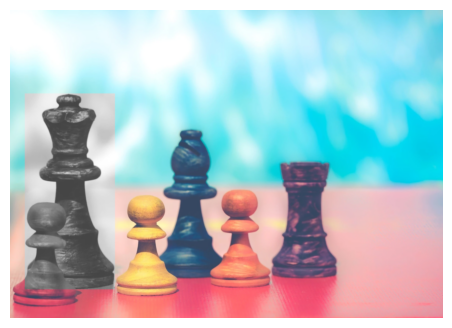

In [56]:
# matplotlib
show_matplotlib_image(img_src)

#### 이미지 좌표 확인 사이트
http://maschek.hu/imagemap/imgmap/

In [69]:
import cv2
import numpy as np

img_src = cv2.imread('images/pawn.webp', cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
#############################################################
pts = [[[70,370],[465,1235]],[[630,525],[980,1195]],[[1155,670],[1455,1195]]]
img_gray = cv2.cvtColor(img_src,cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR)
for i in range(3):
    img_src[pts[i][0][1]:pts[i][1][1],pts[i][0][0]:pts[i][1][0],:] = \
    img_gray[pts[i][0][1]:pts[i][1][1],pts[i][0][0]:pts[i][1][0],:]
#########################################################
img_src = cv2.pyrDown(img_src)
cv2.imshow('src',img_src)
cv2.waitKey()
cv2.destroyAllWindows()

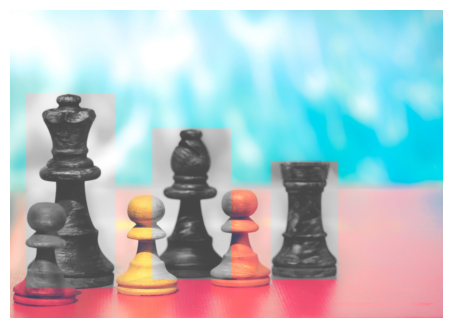

In [70]:
# matplotlib
show_matplotlib_image(img_src)

### 이미지 대칭
- img_dst = cv2.flip(img_src, flipCode)
- flipCode < 0은 XY 축 대칭(상하좌우 대칭)
- flipCode = 0은 X 축 대칭(상하 대칭)
- flipCode > 0은 Y 축 대칭(좌우 대칭)

In [92]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
####################################
img_flip_lr = cv2.flip(img_src, 1) # 좌우
img_flip_ud = cv2.flip(img_src, 0) # 상하
img_flip_lrud = cv2.flip(img_src, -1) # 상하좌우

### text 쓰자
x = int(width/2)-40; y = int(height/8*7)+30
color = (0,0,0)
cv2.putText(img_src, "Source", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color)
cv2.putText(img_flip_lr, "Flip LR", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color)
cv2.putText(img_flip_ud, "Flip UD", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color)
cv2.putText(img_flip_lrud, "LR-UD", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color)

img_u = cv2.hconcat([img_src, img_flip_lr])
img_d = cv2.hconcat([img_flip_ud, img_flip_lrud])
img_dst = cv2.vconcat([img_u,img_d])
####################################
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

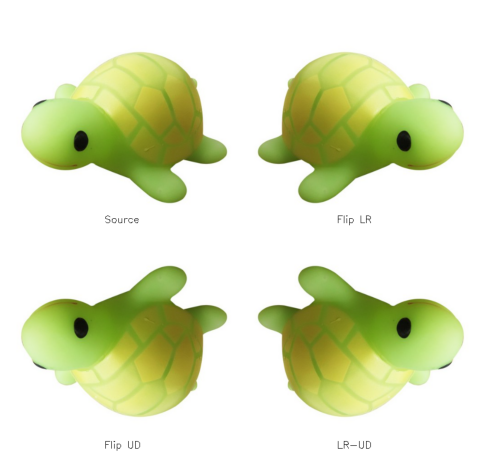

In [94]:
# matplotlib
show_matplotlib_image(img_dst, 6,6)

In [99]:
import cv2
import numpy as np

img_src = cv2.imread('images/turtle.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
####################################
img_flip_lr = cv2.flip(img_src, 1) # 좌우
img_flip_ud = cv2.flip(img_src, 0) # 상하
img_flip_lrud = cv2.flip(img_src, -1) # 상하좌우

### text 쓰자
x = int(width/2)-40; y = int(height/8*7)+10
color = (0,0,0)
img_src = input_korean(img_src, "원본", (x,y), color)
img_flip_lr = input_korean(img_flip_lr, "좌우대칭", (x,y), color)
img_flip_ud = input_korean(img_flip_ud, "상하대칭", (x,y), color)
img_flip_lrud = input_korean(img_flip_lrud, "상하좌우 대칭", (x,y), color)

img_u = cv2.hconcat([img_src, img_flip_lr])
img_d = cv2.hconcat([img_flip_ud, img_flip_lrud])
img_dst = cv2.vconcat([img_u,img_d])
####################################
cv2.imshow('result',img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

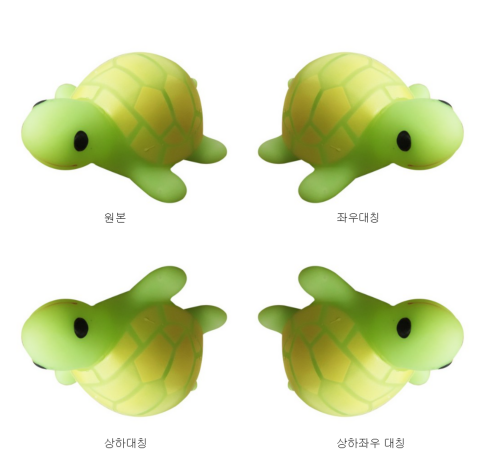

In [100]:
# matplotlib
show_matplotlib_image(img_dst, 6,6)

### 이미지 회전
- 2×3 회전 행렬 생성 함수(cv2.getRotationMatrix2D)로 회전 변환 행렬을 계산
- matrix = cv2.getRotationMatrix2D(center, angle, scale)는 중심점(center), 각도(angle), 비율(scale)로 매핑 변환 행렬(matrix)
<br>

- dst = cv2.warpAffine(src, matrix, (width, height))
- 아핀 변환 함수(cv2.warpAffine)로 회전 변환을 계산합니다.

- dst = cv2.warpAffine(src, M, dsize)는 원본 이미지(src)에 M(아핀 맵 행렬)을 적용하고 출력 이미지 크기(dsize)로 변형

In [105]:
import cv2

img_src = cv2.imread('images/turtle.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]

matrix = cv2.getRotationMatrix2D((int(width/2), int(height/2)), 45, 1)
img_dst = cv2.warpAffine(img_src, matrix, (width, height))

cv2.imshow("src", img_src)
cv2.imshow("dst", img_dst)
cv2.waitKey()
cv2.destroyAllWindows()

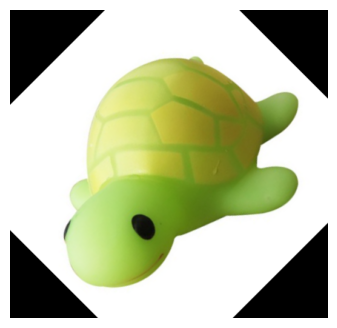

In [106]:
# matplotlib
show_matplotlib_image(img_dst)

In [6]:
import cv2

def get_rotation_matrix(in_image, angle):
    height, width = in_image.shape[:2]
    matrix = cv2.getRotationMatrix2D((int(width/2), int(height/2)), angle, 1)
    return (cv2.warpAffine(in_image, matrix, (width, height)))

img_src = cv2.imread('images/turtle.png',cv2.IMREAD_COLOR)
height, width = img_src.shape[:2]
angles = [0,45,90,135]
img_dst = []
color = (0,0,255)

#함수 사용
for i, angle in enumerate(angles):
    img_dst.append(get_rotation_matrix(img_src, angle))
    #img_dst[i] = input_korean(img_dst[i], str(angle)+"도 회전", (int(width/2)-50,int(height/2)-30), color, 30)
    cv2.putText(img_dst[i], "Angle: "+str(angle), (int(width / 2)-60, int(height / 2)), cv2.FONT_HERSHEY_SIMPLEX, 1, color)
#     cv2.imshow(str(angle), img_dst[i])

# 함수 사용 없이 for만 사용
# for i, angle in enumerate(angles):
#     matrix.append(cv2.getRotationMatrix2D((int(width/2), int(height/2)), angle, 1))
#     img_dst.append(cv2.warpAffine(img_src, matrix[i], (width, height)))
#     img_dst[i] = input_korean(img_dst[i], str(angle)+"도 회전", (int(width/2)-50,int(height/2)-30), color, 30)
#     cv2.imshow(str(angle), img_dst[i])


img_u = cv2.hconcat([img_dst[0], img_dst[1]])
img_d = cv2.hconcat([img_dst[2], img_dst[3]])
img_result = cv2.vconcat([img_u,img_d])
cv2.imshow('result',img_result)    
    
cv2.waitKey()
cv2.destroyAllWindows()

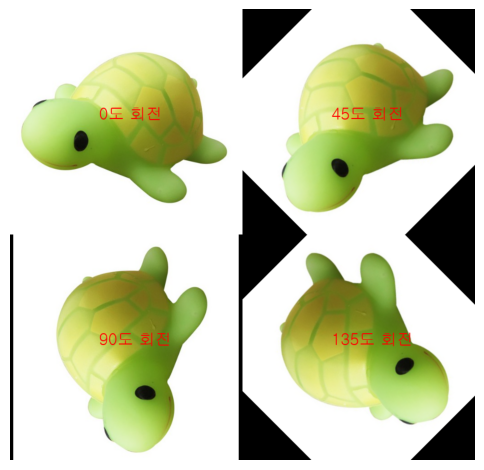

In [18]:
# matplotlib
show_matplotlib_image(img_result,6,6)